In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data as wb
%matplotlib inline

In [3]:
x = ['PG']
df = pd.DataFrame()
df[x] = wb.DataReader(x,data_source = 'yahoo',start = '1-1-2008')['Adj Close']
df.head()

,PG
Date,
2007-12-31,52.179115
2008-01-02,51.390266
2008-01-03,51.390266
2008-01-04,51.184139
2008-01-07,51.518173


In [4]:
log_return = np.log(df/df.shift(1))

In [5]:
log_return

,PG
Date,
2007-12-31,NaN
2008-01-02,-0.015234
2008-01-03,0.000000
2008-01-04,-0.004019
2008-01-07,0.006505
2008-01-08,0.002618
2008-01-09,-0.001928
2008-01-10,-0.000827
2008-01-11,-0.032247


In [8]:
u = log_return.mean()

In [9]:
sigma = log_return.var()

In [10]:
drift = u - sigma*0.5

In [11]:
drift

PG    0.000124
dtype: float64

In [13]:
drift.values

array([0.00012431])

In [15]:
std = log_return.std()

In [16]:
std.values

array([0.0111423])

In [17]:
norm.ppf(0.95)

1.6448536269514722

In [19]:
x = np.random.rand(10,2)

In [20]:
norm.ppf(x)

array([[-0.13488554,  0.75105111],
       [-0.19348546,  0.7620226 ],
       [ 0.12168085,  1.01987712],
       [-0.05016303, -1.5926956 ],
       [-0.44687997,  0.50169997],
       [-0.01006224, -2.19238197],
       [-0.75411654, -0.30835496],
       [ 1.04258661, -1.19337374],
       [-1.32107275, -0.4772576 ],
       [ 0.6605311 ,  2.207224  ]])

In [21]:
t=1000
iterations = 10
daily_returns = np.exp(drift.values + std.values*norm.ppf(np.random.rand(t,iterations)))
daily_returns

array([[0.98291276, 0.99617497, 1.00268156, ..., 0.98729207, 1.00295887,
        1.00289627],
       [0.99212279, 0.99011618, 0.99627784, ..., 1.00743301, 1.00243283,
        0.99707212],
       [0.98864762, 0.9972736 , 0.98737683, ..., 1.0137775 , 1.00024871,
        1.01192825],
       ...,
       [0.9888822 , 0.97609758, 0.99902372, ..., 1.02341023, 1.01397384,
        0.9971549 ],
       [0.98083007, 0.9911856 , 1.0004223 , ..., 0.9867231 , 0.98922602,
        1.03339544],
       [0.99964775, 0.99474825, 1.01986434, ..., 1.0032675 , 1.02209359,
        1.00836573]])

In [23]:
initial_price = df.iloc[-1]
initial_price

PG    87.360001
Name: 2018-12-24 00:00:00, dtype: float64

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list[0] = initial_price

In [28]:
for r in range(1,t):
    price_list[r] = price_list[r-1]*daily_returns[r]

In [29]:
price_list

array([[ 87.36000061,  87.36000061,  87.36000061, ...,  87.36000061,
         87.36000061,  87.36000061],
       [ 86.67184722,  86.49655007,  87.03483232, ...,  88.00934834,
         87.57253249,  87.10422141],
       [ 85.68791523,  86.26072584,  85.93617722, ...,  89.22189693,
         87.59431264,  88.14322274],
       ...,
       [118.48753973,  72.36532404, 111.49411262, ..., 105.92152704,
        111.50860751,  93.22268052],
       [116.21614247,  71.72746703, 111.54119677, ..., 104.51521722,
        110.30721631,  96.33589261],
       [116.17520492,  71.35077245, 113.75688863, ..., 104.85672033,
        112.74429837,  97.14181231]])

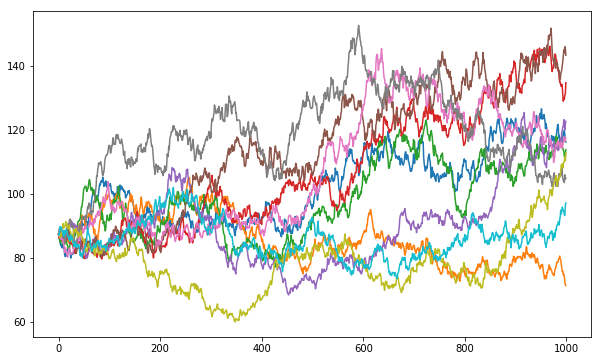

In [32]:
plt.figure(figsize = (10,6))
plt.plot(price_list)
plt.show()